zadanie 1
a) Policz ile jest w bazie brakujących lub nieuzupełnionych danych. Wyświetl
statystyki bazy danych z błędami.

import

In [2]:
import pandas as pd
import numpy as np

In [12]:
missing_values = ["NA", "-"]
df = pd.read_csv("iris_with_errors.csv", na_values = missing_values)
# powinno byc piec
print(df.isnull().sum())

sepal.length    2
sepal.width     1
petal.length    1
petal.width     1
variety         0
dtype: int64


b) Sprawdź czy wszystkie dane numeryczne są z zakresu (0; 15). Dane spoza
zakresu muszą być poprawione. Możesz tutaj użyć metody: za błędne dane
podstaw średnią (lub medianę) z danej kolumny.

In [50]:
missing_values = ["NA", "-"]
df = pd.read_csv("iris_with_errors.csv", na_values = missing_values)
df["sepal.length"].fillna(-1, inplace=True)
df["sepal.width"].fillna(-1, inplace=True)
df["petal.length"].fillna(-1, inplace=True)
df["petal.width"].fillna(-1, inplace=True)
# sepal length----------------------------------------------------------------------
sum = 0
cnt = 0
for row in df["sepal.length"]:
    if float(df.loc[cnt, "sepal.length"]) > 0 or float(df.loc[cnt, "sepal.length"]) < 15:
        sum += float(df.loc[cnt, "sepal.length"])
    cnt += 1

mediana = sum/150

cnt = 0
for row in df["sepal.length"]:
    if float(df.loc[cnt, "sepal.length"]) <= 0 or float(df.loc[cnt, "sepal.length"]) >= 15:
        sum += float(df.loc[cnt, "sepal.length"])
        df.loc[cnt,'sepal.length'] = str(mediana)
    cnt += 1

# sepal.width----------------------------------------------------------------------
sum = 0
cnt = 0
for row in df["sepal.width"]:
    if float(df.loc[cnt, "sepal.width"]) > 0 or float(df.loc[cnt, "sepal.width"]) < 15:
        sum += float(df.loc[cnt, "sepal.width"])
    cnt += 1

mediana = sum/150

cnt = 0
for row in df["sepal.width"]:
    if float(df.loc[cnt, "sepal.width"]) <= 0 or float(df.loc[cnt, "sepal.width"]) >= 15:
        sum += float(df.loc[cnt, "sepal.width"])
        df.loc[cnt,'sepal.width'] = str(mediana)
    cnt += 1

# petal.length----------------------------------------------------------------------
sum = 0
cnt = 0
for row in df["petal.length"]:
    if float(df.loc[cnt, "petal.length"]) > 0 or float(df.loc[cnt, "petal.length"]) < 15:
        sum += float(df.loc[cnt, "petal.length"])
    cnt += 1

mediana = sum/150

cnt = 0
for row in df["petal.length"]:
    if float(df.loc[cnt, "petal.length"]) <= 0 or float(df.loc[cnt, "petal.length"]) >= 15:
        sum += float(df.loc[cnt, "petal.length"])
        df.loc[cnt,'petal.length'] = str(mediana)
    cnt += 1

# petal.width----------------------------------------------------------------------
sum = 0
cnt = 0
for row in df["petal.width"]:
    if float(df.loc[cnt, "petal.width"]) > 0 or float(df.loc[cnt, "petal.width"]) < 15:
        sum += float(df.loc[cnt, "petal.width"])
    cnt += 1

mediana = sum/150

cnt = 0
for row in df["petal.width"]:
    if float(df.loc[cnt, "petal.width"]) <= 0 or float(df.loc[cnt, "petal.width"]) >= 15:
        sum += float(df.loc[cnt, "petal.width"])
        df.loc[cnt,'petal.width'] = str(mediana)
    cnt += 1

print(df)

    sepal.length sepal.width       petal.length petal.width    variety
0            5.1         3.5                1.4         0.2     Setosa
1            4.9         3.0                1.4         0.2     Setosa
2            4.7         3.2                1.3         0.2     Setosa
3            4.6         3.1                1.5         0.2     Setosa
4            5.0         3.6                1.4         0.2     Setosa
..           ...         ...                ...         ...        ...
145          6.7         3.0                5.2         2.3  Virginica
146          6.3         2.5                5.0         1.9  Virginica
147          6.5         3.0                5.2         2.0  Virginica
148          6.2         3.4  3.758666666666669         2.3  Virginica
149          5.9         3.0                5.1         1.8  Virginica

[150 rows x 5 columns]


c)Sprawdź czy wszystkie gatunki są napisami: „Setosa”, „Versicolor” lub „Virginica”.
Jeśli nie, wskaż jakie popełniono błędy i popraw je własną (sensowną) metodą.

In [64]:
correct_names = ["Setosa", "Versicolor", "Virginica"]

numberOfWrongNames = 0
cnt = 0
for row in df["variety"]:
    if df.loc[cnt, "variety"] not in correct_names:
        numberOfWrongNames += 1
    cnt += 1

print(numberOfWrongNames) # 7

# test = "fdsADDFV"
# print(test.lower().capitalize())
cnt = 0
for row in df["variety"]:
    if df.loc[cnt, "variety"] not in correct_names:
        # powiększamy pierwszą literkę
        correct_name = str(df.loc[cnt, "variety"]).capitalize()

        # usuwamy u
        correct_name = "Versicolor" if correct_name == "Versicolour" else correct_name

        df.loc[cnt,'variety'] = correct_name
    cnt += 1

# i ponownie liczymy dla pewności
numberOfWrongNames = 0
cnt = 0
for row in df["variety"]:
    if df.loc[cnt, "variety"] not in correct_names:
        numberOfWrongNames += 1
    cnt += 1

print(numberOfWrongNames) # 0

0
0


Popełnione błędy:
* pierwsza litera jest mała
* jest "Versicolour" zamiast "Versicolor"

Zadanie 2
a)
b) Dokonaj PCA na bazie danych. Przyjrzyj się nowym kolumnom i wariancjom. Ile
kolumn można usunąć, tak aby zachować minimum 80% wariancji (strata
informacji nie może być większa niż 20%)? Korzystając z poniższego wzoru,
swoją odpowiedź uzasadnij.

In [55]:
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# print(df)
# print(x)

from sklearn.decomposition import PCA

# pca2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
                           , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

# print(finalDf)

# pca3
pca3 = PCA(n_components=3)
principalComponents3 = pca3.fit_transform(x)
principalDf3 = pd.DataFrame(data = principalComponents3
                           , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDf3 = pd.concat([principalDf3, df[['target']]], axis = 1)

# pca1
pca1 = PCA(n_components=1)
principalComponents1 = pca1.fit_transform(x)
principalDf1 = pd.DataFrame(data = principalComponents1
                            , columns = ['principal component 1'])

finalDf1 = pd.concat([principalDf, df[['target']]], axis = 1)

# print(finalDf)
# print("pca do 2 kolumn")
# print(pca.explained_variance_ratio_)
# print("--------------------------")
# print("pca do 3 kolumn")
# print(pca3.explained_variance_ratio_)
# print("--------------------------")
# print("pca do 1 kolumny")
# print(pca1.explained_variance_ratio_)
pca3.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832])

"~=" - oznacza, w zaokrągleniu

Kolumna1, wariancja ~= 72.77%
Kolumna2, wariancja ~= 23.03%
Kolumna3, wariancja ~= 3.68%

Po usunięciu jednej kolumny, strata ~= 0.52%
Po usunięciu dwóch kolumn, strata ~= 4.2%
Po usunięciu trzech kolumn, strata ~= 27.23%
Czyli możemy usunąć maksymalnie dwie kolumny, przy tzeciej przekraczamy 20% straty.

PCA do 2 kolumn wizualizacja

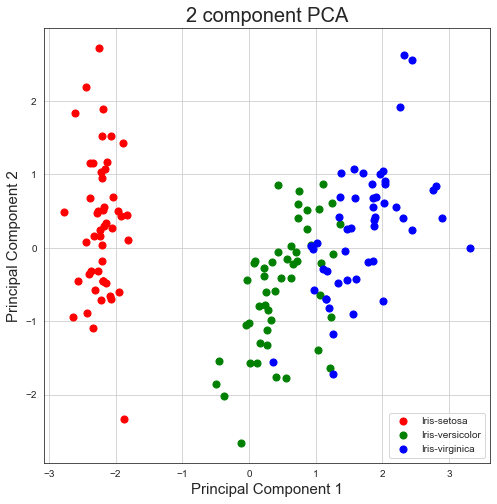

In [47]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

PCA do 3 kolumn wizualizacja

C:\Users\mmale\AppData\Local\Temp\ipykernel_15948\2588137704.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df3D = df3D.drop('species', 1)


<Figure size 480x480 with 0 Axes>

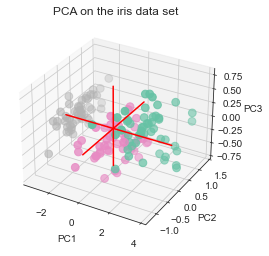

In [48]:
import seaborn as sns

# Get the iris dataset
sns.set_style("white")
df3D = sns.load_dataset('iris')

# create figure
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Keep the 'species' column appart + make it numeric for coloring
df3D['species']=pd.Categorical(df3D['species'])
my_color=df3D['species'].cat.codes
df3D = df3D.drop('species', 1)

# Run The PCA
pca = PCA(n_components=3)
pca.fit(df3D)

# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(df3D), columns=['PCA0', 'PCA1', 'PCA2'], index=df3D.index)

# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)

# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
plt.show()